# Plotting with Matplotlib

### Overview
Matplotlib is a package that was designed for plotting in a way that is very similar to Matlab. I would say it's biggest difference is the loss of interactive plotting/rescaling. This means you need to be a little smarter with how you plot your data. In particular, decoupling your data generation and plotting code is a good idea. Then you can re-run your plotting code frequently without regenerating data.

### Resources
- The [matplotlib gallery](https://matplotlib.org/gallery.html) has a lot of pictures of different plot types

## Preliminaries

We need to specify for jupyter that we want our plots in-line, otherwise the plots won't show. You don't need this line in Spyder.

Now, as always, we first need to import the module. Matplotlib comes with a bunch of different things under the hood, but 99% of the time you will use its submodule `pyplot`. Thus, I pretty much always import like this:

In [2]:
import matplotlib.pyplot as plt  # it's tradition to import it as plt
import numpy as np  # will use numpy to generate fake data

## Creating Figures, Axes, and Subplots

Matplotlib won't redraw a figure's size if it has already been created, so I recommend closing all figures at the beginning of scripts if you need one with a specific size.

In [3]:
plt.close('all')  # close all figures

Now, we create a figure using the `plt.figure()` command. A list of possible figure options can be found [here](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20figure#matplotlib.pyplot.figure).

In [4]:
fig1 = plt.figure(num=1, figsize=(6,3))  # assign figure handle to variable `fig`
plt.clf()  # clear the figure in case it was already created (this prints the figure handle in jupyter)

<Figure size 600x300 with 0 Axes>

We can add a single axis to the current figure...

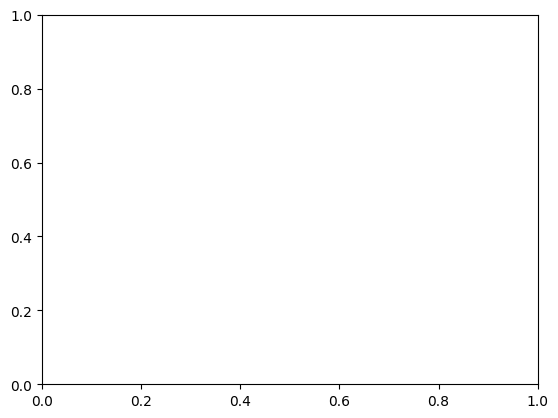

In [5]:
ax1 = plt.axes()  # create axes in the current figure

Or add many subplots to the figure using `plt.subplot(n_x, n_y, plot_i)`. Note that, unlike pretty much everything else in python, the subplot index starts at 1. (This is to match Matlab's indexing.)

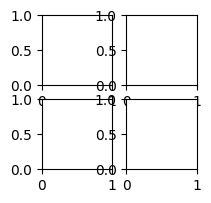

In [6]:
fig2 = plt.figure(2, figsize=(2,2))  # create a second figure
axs = [plt.subplot(2, 2, i) for i in range(1, 5)]  # create a list of the handles to subplot axes handles

In the above line, I use Python's "list comprehension" to create my list of axes handles on one line. List comprehension is basically a one-line for loop with some optional logic if you want it. Here's a quick demo.

In [7]:
x = ['cat', 'dog', 'bird', 'parrot', 'mouse', 'avocado']
[print(x[i], '(l.c.)') for i in range(len(x)) if len(x[i]) < 6]  # print using list comprehension
for i in range(len(x)):
    if len(x[i]) < 6:
        print(x[i], '(f.l.)')

cat (l.c.)
dog (l.c.)
bird (l.c.)
mouse (l.c.)
cat (f.l.)
dog (f.l.)
bird (f.l.)
mouse (f.l.)


## Plotting: 2D and 3D

You can do pretty much everything in matplotlib you would do in Matlab.

Line plots... 

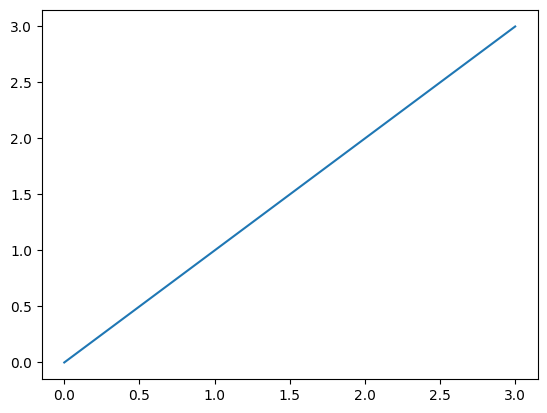

In [8]:
plt.plot(np.arange(4), np.arange(4))

Scatter plots...

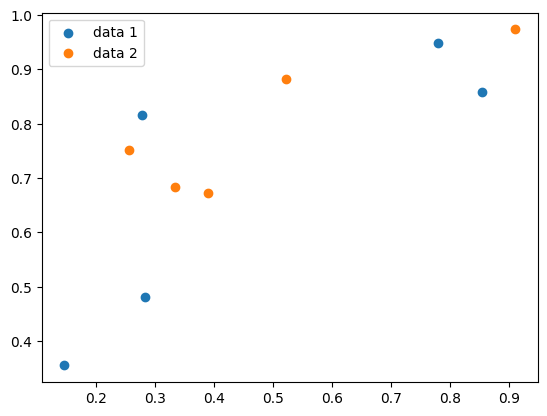

In [9]:
plt.scatter(np.random.rand(5), np.random.rand(5), label='data 1')  # random data 1
plt.scatter(np.random.rand(5), np.random.rand(5), label='data 2')  # random data 2
plt.legend()  # add a legend (google `pyplot legend` for many more legend options)

Contour plots...

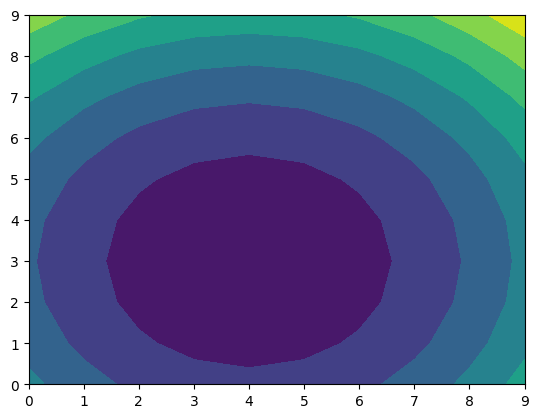

In [10]:
x_mat, y_mat = np.meshgrid(np.arange(10), np.arange(10))
z_mat = x_mat + 2 * y_mat + 0.50 * (x_mat - 5) ** 2 + 0.50 * (y_mat - 5) ** 2
plt.contourf(x_mat, y_mat, z_mat)

3D surface plots... (Note that for this one, we need to change our magic matploblib function to `notebook` to get interactive plots.)

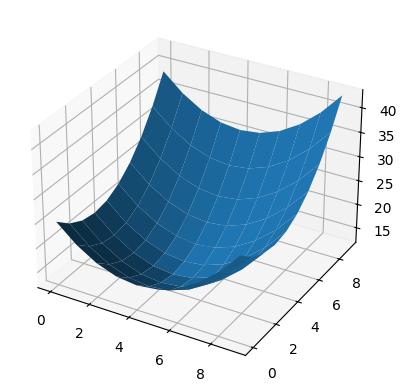

In [11]:
from mpl_toolkits.mplot3d import Axes3D  # need a special import for 3D plots
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # also need to specify a 3D projection
ax.plot_surface(x_mat, y_mat, z_mat)

## Adding Labels, Titles, and Rescaling

Usually at the end of my visualization scripts, I "prettify" my plots by adding labels, titles, and making sure the axes look nice.

A few things to note:
- You can set x (and y) labels either with `plt.xlabel(str)` or `ax.set_xlabel(str)`
- Matplotlib's subplot function is not so good with placing the axes, so the `plt.tight_layout()` function is very nice for rescaling functions to a specific rectangle in the figure window

Text(0.5, 0.98, 'This is a title.')

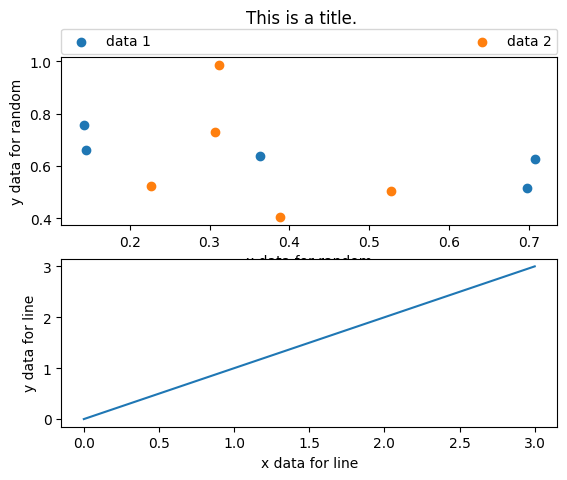

In [12]:
fig = plt.figure()  # make a new figure

# AXES 1: random data
ax1 = plt.subplot(2, 1, 1)
plt.scatter(np.random.rand(5), np.random.rand(5), label='data 1')
plt.scatter(np.random.rand(5), np.random.rand(5), label='data 2')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode='expand', borderaxespad=0.)  # google `pyplot legend` for many more legend options

plt.xlabel('x data for random')  # method 1 for setting axes labels
plt.ylabel('y data for random')


# AXES 2: line
ax2 = plt.subplot(2, 1, 2)  # second axes: a line
plt.plot(range(4), range(4))

ax2.set_xlabel('x data for line')  # method 2 for setting axes labels
ax2.set_ylabel('y data for line')

plt.suptitle('This is a title.')
# plt.tight_layout(rect=[0, 0, 1, 0.90])  # matplotlib is not great at figure placement, so scale subplots manually